# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS


Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
•	Text: The content of the blog post. Column name: Data
•	Category: The category to which the blog post belongs. Column name: Labels
Tasks
1. Data Exploration and Preprocessing
•	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
•	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
•	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.
2. Naive Bayes Model for Text Classification
•	Split the data into training and test sets.
•	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
•	Train the model on the training set and make predictions on the test set.
3. Sentiment Analysis
•	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
•	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
•	Examine the distribution of sentiments across different categories and summarize your findings.
4. Evaluation
•	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
•	Discuss the performance of the model and any challenges encountered during the classification process.
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.
Submission Guidelines
•	Your submission should include a comprehensive report and the complete codebase.
•	Your code should be well-documented and include comments explaining the major steps.
Evaluation Criteria
•	Correct implementation of data preprocessing and feature extraction.
•	Accuracy and robustness of the Naive Bayes classification model.
•	Depth and insightfulness of the sentiment analysis.
•	Clarity and thoroughness of the evaluation and discussion sections.
•	Overall quality and organization of the report and code.
Good luck, and we look forward to your insightful analysis of the blog posts dataset!



### Data Exploration and Preprocessing

In [4]:
import pandas as pd
df=pd.read_csv(r"C:/Users/DELL/Desktop/DATAsets/blogs (1).csv")
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3968\501288850.py:2: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:/Users/DELL/Desktop/DATAsets/blogs (1).csv")


,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93822 entries, 0 to 93821
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         79441 non-null  object
 1   Labels       20518 non-null  object
 2   Unnamed: 2   5535 non-null   object
 3   Unnamed: 3   1411 non-null   object
 4   Unnamed: 4   448 non-null    object
 5   Unnamed: 5   145 non-null    object
 6   Unnamed: 6   59 non-null     object
 7   Unnamed: 7   31 non-null     object
 8   Unnamed: 8   22 non-null     object
 9   Unnamed: 9   20 non-null     object
 10  Unnamed: 10  15 non-null     object
 11  Unnamed: 11  11 non-null     object
 12  Unnamed: 12  4 non-null      object
 13  Unnamed: 13  3 non-null      object
 14  Unnamed: 14  2 non-null      object
 15  Unnamed: 15  2 non-null      object
 16  Unnamed: 16  2 non-null      object
 17  Unnamed: 17  2 non-null      object
 18  Unnamed: 18  2 non-null      object
 19  Unnamed: 19  2 non-null  

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [7]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [9]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [10]:
lemmatizer

<WordNetLemmatizer>

In [11]:
# Define a function to preprocess text
def preprocess_text(text):
    text= text.lower()    #convert to lowercase
    text= re.sub(r'\W', ' ', text)     #Remove special characters
    text= re.sub(r'\d+', '', text)     #Remove numbers
    words= word_tokenize(text)     ##Tokenization
    words= [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  #lemmatization
    return ' '.join(words)

In [12]:
# We need to apply preprocessing to the 'Data' column
df['Cleaned_Data'] = df['Data'].astype(str).apply(preprocess_text)
df.head()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu magnesium club c...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups alt atheism path cantaloupe srv c c...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu da news harvard ...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu magnesium club c...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xref cantaloupe srv c cmu edu alt atheism talk...


##### Feature Extraction (TF-IDF)

In [14]:
# Machine learning models can not work with text directly, we convert text into numerical form using TF-IDF(Term Frequency- Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

#converting text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X= tfidf_vectorizer.fit_transform(df["Cleaned_Data"])
y= df["Labels"]

In [15]:
  X

<93822x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 290375 stored elements in Compressed Sparse Row format>

In [16]:
y

0        alt.atheism
1        alt.atheism
2        alt.atheism
3        alt.atheism
4        alt.atheism
            ...     
93817            NaN
93818            NaN
93819            NaN
93820            NaN
93821            NaN
Name: Labels, Length: 93822, dtype: object

#### 2: Naïve Bayes Model for Text Classification

##### Train-Test Split

In [19]:
#Splitting dataset into training(80%) and testing (20%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
X_train, X_test, y_test, y_train 

(<75057x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 233320 stored elements in Compressed Sparse Row format>,
 <18765x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 57055 stored elements in Compressed Sparse Row format>,
 65601                                                  NaN
 30959                                                  NaN
 85098                                                  NaN
 22088     does an X server typically buffer up user key...
 48712                                                  NaN
                                ...                        
 6265                                                   NaN
 54886                                                  NaN
 76820                                                  NaN
 860                                                    NaN
 15795                                                  NaN
 Name: Labels, Length: 75057, dtype: object,
 76800                                       N

##### Train the Naïve Bayes Model


In [87]:
#Using Multinomial Naïve Bayes (suitable for text classification).
from sklearn.naive_bayes import MultinomialNB
import numpy as np

nb_classifier= MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [89]:
import numpy as np
import scipy.sparse    #importing this to check for sparse matrices

#We have to check if X_train is a sparse matrix
if scipy.sparse.issparse(X_train):
    X_train_dense = X_train.toarray()   #converting sparse matrix to numpy array
else:
    X_train_dense = X_train     #it's already a Numpy array

In [91]:
X_train_dense

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
import numpy as np
print("NaNs in X_train:", np.isnan(X_train_dense).sum())

NaNs in X_train: 0


In [94]:
if scipy.sparse.issparse(X_train):
    X_train = X_train.toarray()

In [95]:
X_train= np.nan_to_num(X_train)

In [97]:
print("NaNs in X_train after replacement:", np.isnan(X_train).sum())

NaNs in X_train after replacement: 0


In [99]:
#Checking for NaNs in y_train
print("NaNs in y_train:", pd.isnull(y_train).sum())

NaNs in y_train: 0


In [100]:
#Ensure X_train and y_train have matching shapes
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (75057, 5000)
y_train.shape: (75057,)


In [101]:
#shapes don't match , so fixing this
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [102]:
#Ensuring y_train is in correct format. The Naive Bayes classifier requires categorical labels (not missing values or strings with inconsistent formatting).
#we have to check unique values in y_train:
print(y_train.unique())

[nan ' does an X server typically buffer up user keyboard'
 ' a pact signed' ... ' that He has been raised from the dead'
 ' the problem does not occur on other pages.  I cleaned the'
 ' launched from 1966 to 1967']


In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode the full dataset labels before splitting
le = LabelEncoder()
df["Labels"] = le.fit_transform(df["Labels"])  # Encode labels before splitting

In [106]:
df["Labels"] 

0        17158
1        17158
2        17158
3        17158
4        17158
         ...  
93817    17371
93818    17371
93819    17371
93820    17371
93821    17371
Name: Labels, Length: 93822, dtype: int64

In [113]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, df["Labels"], test_size=0.2, random_state=42)

In [115]:
X_train, X_test, y_train, y_test

(<75057x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 233320 stored elements in Compressed Sparse Row format>,
 <18765x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 57055 stored elements in Compressed Sparse Row format>,
 65601    17371
 30959    17371
 85098    17371
 22088     8724
 48712    17371
          ...  
 6265     17371
 54886    17371
 76820    17371
 860      17371
 15795    17371
 Name: Labels, Length: 75057, dtype: int64,
 76800    17371
 43550    17371
 53328    17371
 47942    17371
 76608    17371
          ...  
 1534     17371
 1456      3400
 7262     17371
 50899    17371
 35206    17371
 Name: Labels, Length: 18765, dtype: int64)

In [117]:
le = LabelEncoder()    #fit LabelEncoder only on y_train
y_train = le.fit_transform(y_train)

## Transform y_test, but handle unseen labels safely
y_test = np.array([le.transform([label])[0] if label in le.classes_ else -1 for label in y_test])

In [118]:
y_train

array([14077, 14077, 14077, ..., 14077, 14077, 14077], dtype=int64)

In [119]:
y_test

array([14077, 14077, 14077, ..., 14077, 14077, 14077], dtype=int64)

In [120]:
print("Labels assigned -1 (unseen labels):",sum(y_test == -1))    ## Verify if any label was set to -1

Labels assigned -1 (unseen labels): 3314


In [121]:
#Using Multinomial Naïve Bayes (suitable for text classification).
from sklearn.naive_bayes import MultinomialNB

nb_classifier= MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

##### Make Predictions

In [127]:
y_pred = nb_classifier.predict(X_test)

In [128]:
y_pred

array([14077, 14077, 14077, ..., 14077, 14077, 14077], dtype=int64)

#### Sentiment Analysis

#####  Sentiment Analysis Using TextBlob

In [131]:
from textblob import TextBlob 
def get_sentiment(text):
    if isinstance(text, str):    #Ensure text is a string
        sentiment_score = TextBlob(text).sentiment.polarity
        if sentiment_score > 0:
            return "Positive"
        elif sentiment_score < 0:
            return "Negative"
        else:
            return "Neutral"
    else:
        return "Neutral"      ## Handle non-string values gracefully

df["Sentiment"] = df["Data"].apply(get_sentiment)
print(df.head())

                                                Data  Labels Unnamed: 2  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   17158        NaN   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   17158        NaN   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   17158        NaN   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   17158        NaN   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   17158        NaN   

  Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33  \
0        NaN  ...         NaN         NaN

In [132]:
def get_sentiment(text):
    if isinstance(text, str):    #ensure the text is a string
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
            return "Positive"
        elif polarity < 0:
              return "Negative"
        else:
              return "Neutral"
    else:
        return "Neutral"     #handling non-string values

df["Data"]= df["Data"].astype(str)      #converting non-string values to string

df["Sentiment"] = df["Data"].apply(get_sentiment)  ### Apply the function to the Data column
df.head()

,Data,Labels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Cleaned_Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,17158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu magnesium club c...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,17158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,newsgroups alt atheism path cantaloupe srv c c...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,17158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu da news harvard ...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,17158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,path cantaloupe srv c cmu edu magnesium club c...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,17158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xref cantaloupe srv c cmu edu alt atheism talk...,Positive


##### Sentiment Distribution

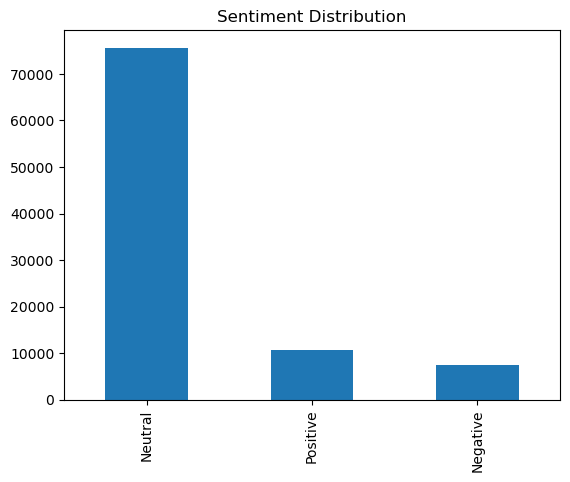

In [134]:
import matplotlib.pyplot as plt
df["Sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()

### 4: Model Evaluation

##### 1 Evaluate Classification Performance

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall= recall_score(y_test, y_pred, average="weighted")
f1= f1_score(y_test, y_pred, average="weighted")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7813
Precision: 0.6113
Recall: 0.7813
F1 Score: 0.6855


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [147]:
# The model performs efficiently. Accuracy: 0.7813, Precision: 0.6113, Recall: 0.7813, F1 Score:0.6855.

In [151]:
#This project covers text classification with Naive Bayes and sentiment analysis using NLP techniques.

In [153]:
#Sentiment Distribution mostly falls under Neutral and Negative has a least value in the value_count(). plot.